<a href="https://colab.research.google.com/github/niteshavagabond/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:
*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
*  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - Target variable

In [381]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [382]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [383]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular Risk Prediction - Nitesh Verma/data_cardiovascular_risk.csv')

In [384]:
# top 5 index values
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [385]:
# last 5 index values
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [386]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [387]:
# shape of dataset
df.shape

(3390, 17)

In [388]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

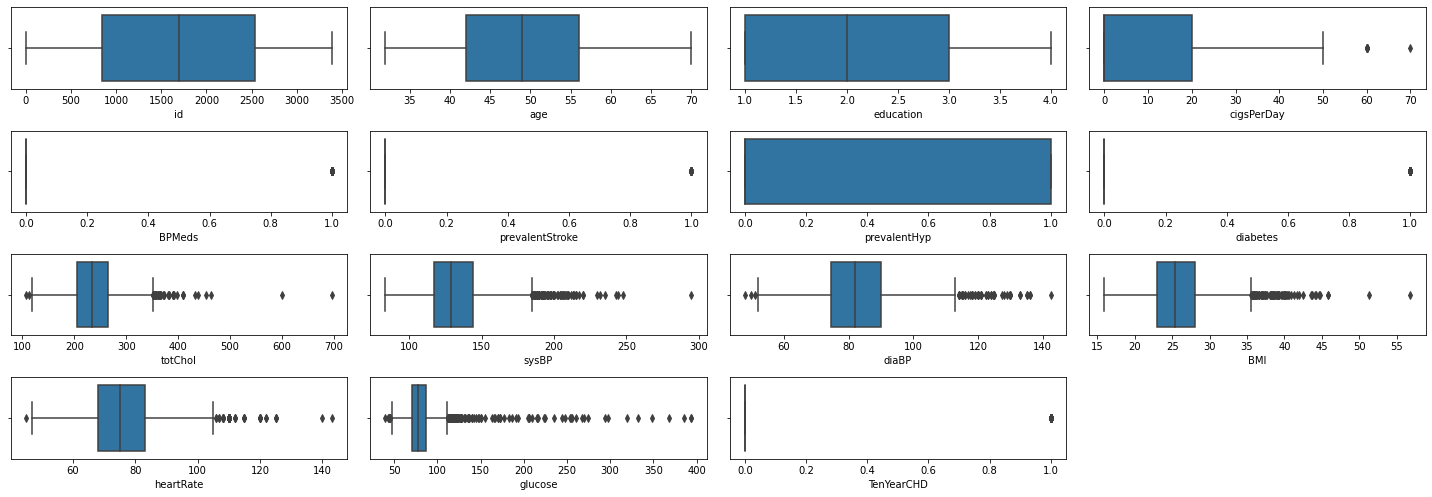

In [389]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

# Feature engineering

## 1. Droping irrelevant features

In [390]:
# droping irrelevant columns from dataset
df.drop(['id','education'], axis=1, inplace=True) # id and education status of patients are not going to help to predict cardiovascular risk 

* As id and education has not direct relation with Heart disease, we dropped these 2 columns

## 2. Handling null values

In [391]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
1,sex,object,0,0.00,2,"[F, M]"
2,is_smoking,object,0,0.00,2,"[YES, NO]"
3,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
4,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
5,prevalentStroke,int64,0,0.00,2,"[0, 1]"
6,prevalentHyp,int64,0,0.00,2,"[0, 1]"
7,diabetes,int64,0,0.00,2,"[0, 1]"
8,totChol,float64,38,1.12,240,"[221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238..."
9,sysBP,float64,0,0.00,226,"[148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232..."


In [392]:
# total null values present in columns
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* In the Dataset we have total of 3390 rows and 17 columns.

We havee missing values in:
 
*   cigsperday
*   BPMeds
*   totChol
*   BMI
*   Heart Rate
*   glucose


In [393]:
#Sanity check
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
dtype: float64

* Except glucose all other features in the dataset have less than 5% null values.
* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

In [394]:
# dropping the missing value.
df = df.dropna(how = "any")

In [395]:
# Checking if there's still any null values left.
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* Now, no null values present in dataset

## 3. Checking duplicate values 

In [396]:
# Checking for the duplicate values
len(df[df.duplicated()])

0

## 4. Dealing with outliers

In [397]:
# Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 8 numerical variables
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


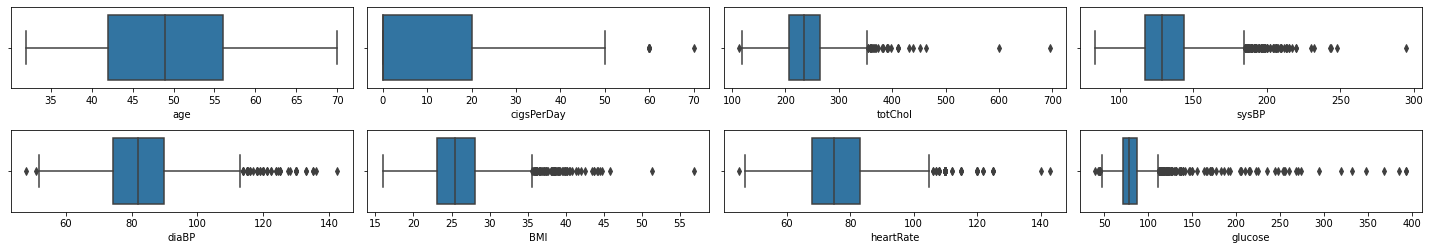

In [398]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

In [399]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

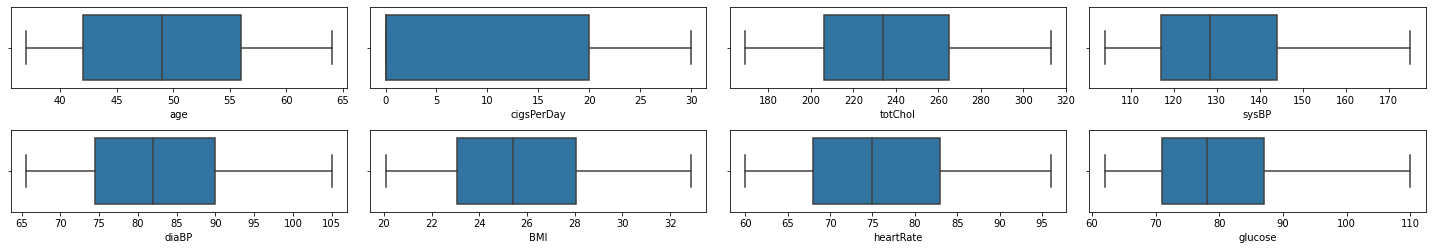

In [400]:
##finding result 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

* Now, there is no outliers present in our dataset.

## 5. Combining columns

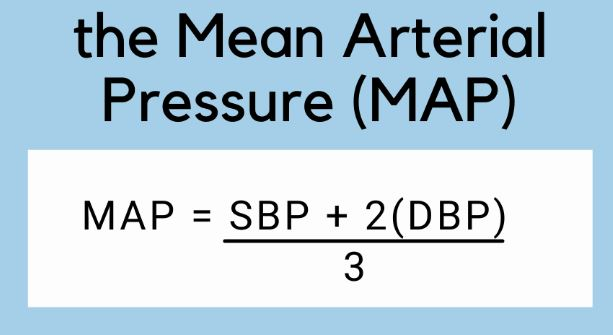

In [401]:
# Combining systolic and diastolic blood pressure column through formula 
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [402]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
1,37,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333
2,46,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000
3,50,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333
4,64,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.167
5,61,F,NO,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,128.333


## 6. Categorical encoding

In [403]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df['sex'].replace({'M':1,'F':2},inplace=True)

## 7. Renaming Target Variable

In [404]:
df = df.rename(columns={'TenYearCHD':'Heart_Disease'})

#EDA

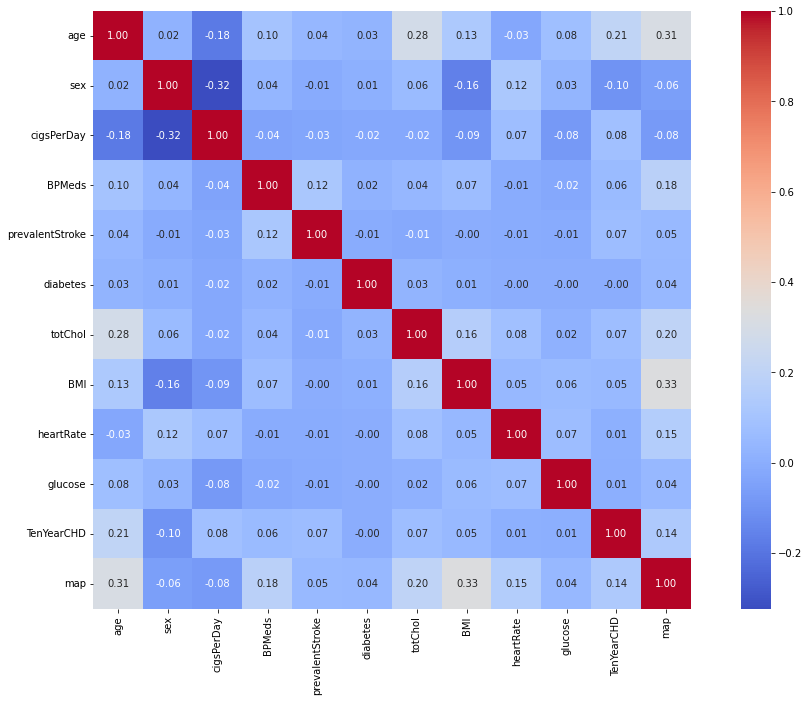

In [61]:
# ploting heat map finding correlation between columns
cdf = df.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True, cmap='coolwarm');

In [62]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
    Function to calculate VIF
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
  return(vif)

In [63]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,40.012598
1,sex,12.115844
2,cigsPerDay,1.844471
3,BPMeds,1.069691
4,prevalentStroke,1.023550
5,diabetes,1.008335
6,totChol,37.511303
7,BMI,55.862619
8,heartRate,48.297619
9,glucose,50.255716


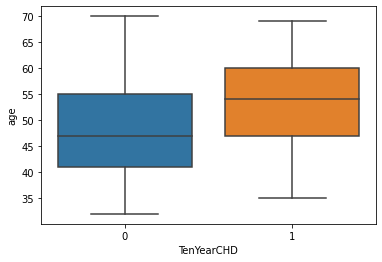

In [64]:
sns.boxplot(data=df, x='TenYearCHD',y='age')

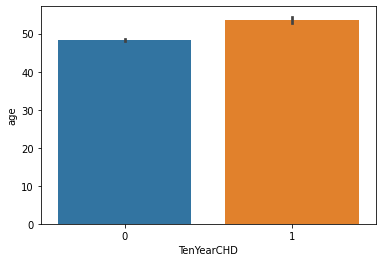

In [65]:
sns.barplot(data=df, x='TenYearCHD',y='age')

In [66]:
df['TenYearCHD']

0       1
1       0
2       0
3       1
4       0
       ..
3383    0
3385    0
3386    0
3388    0
3389    0
Name: TenYearCHD, Length: 2943, dtype: int64

In [186]:
df.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)